# Data Analysis

In [13]:
import os
import numpy as np
import pandas as pd

from fitparse import FitFile
import gpxpy
import gpxpy.gpx

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import gmplot

## Load Data

### Application

In [14]:
data_path = "../data/android_app/"
date = "2023_04_14"
rec = 1

# Acceleration data
acc_data = pd.read_csv(os.path.join(data_path, date, "DATA" + str(rec) + ".txt"), sep=";", header=1, names=["ax", "ay", "az"])

## Acceleration Data

In [15]:
acc_data

,ax,ay,az
0,0.478840,-0.114922,11.166556
1,0.794875,-0.258574,9.988609
2,-0.555455,0.325611,10.046070
3,0.181959,0.488417,9.548077
4,0.545878,0.009577,9.490616
...,...,...,...
1820,-0.067038,0.335188,8.714894
1821,-0.584185,0.306458,9.768343
1822,0.201113,-0.124498,10.486604
1823,0.258574,-0.067038,10.429143


In [16]:
acc_data.describe()

,ax,ay,az
count,1825.000000,1825.000000,1825.000000
mean,0.018130,0.129741,9.880630
std,1.875893,1.719988,2.375429
min,-13.924677,-10.515334,-10.314221
25%,-0.143652,0.076614,9.816227
50%,-0.067038,0.143652,9.873688
75%,0.191536,0.248997,9.931149
max,15.610195,10.438720,33.413480


In [17]:
# acc_data.hist(column="ax")

In [18]:
acc_data.isna().sum()

ax    0
ay    0
az    0
dtype: int64

Text(0.5, 1.0, 'Acceleration Z')

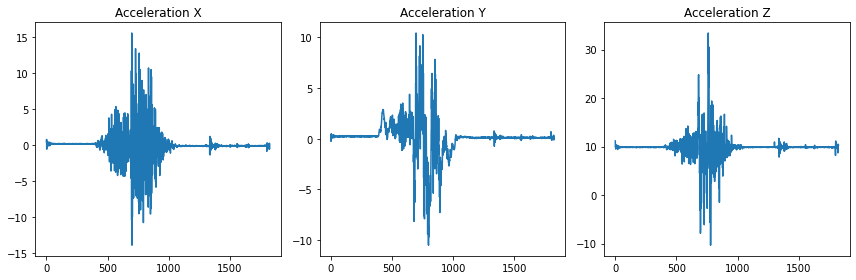

In [19]:
nb_measure = acc_data.shape[0]

fig, axs = plt.subplots(1,3)
fig.set_tight_layout(True)
fig.set_size_inches(12, 4)
axs[0].plot(range(nb_measure), acc_data["ax"])
axs[0].set_title("Acceleration X")
axs[1].plot(range(nb_measure), acc_data["ay"])
axs[1].set_title("Acceleration Y")
axs[2].plot(range(nb_measure), acc_data["az"])
axs[2].set_title("Acceleration Z")

In [20]:
def single_graph(df):
    fig = go.Figure()
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col))
    return fig

def triple_graph(df):
    col_num = 1
    fig = make_subplots(rows=1, cols=3)
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col), row=1, col=col_num)
      col_num += 1
    fig.update_layout(height=1080/2, width=1920/2, title_text="Test")
    return fig

In [21]:
# fig = single_graph(acc_data[["ax", "ay", "az", "norm"]])
fig = single_graph(acc_data[["ax", "ay", "az"]])
fig.write_html("data_analysis_acc_1.html", full_html=False, include_plotlyjs="cdn")
fig.show()

In [22]:
fig = triple_graph(acc_data[["ax", "ay", "az"]])
fig.write_html("data_analysis_acc_2.html", full_html=False, include_plotlyjs="cdn")
fig.show()

## GPS Data

In [23]:
gps_data

NameError: name 'gps_data' is not defined

In [ ]:
units # Check if data has been converted when loading

{'alt': '?', 'lat': 'deg', 'long': 'deg'}

In [ ]:
gps_data.describe()

,lat,long
count,127.000000,127.000000
mean,48.403793,7.446247
std,0.003757,0.003521
min,48.397830,7.438549
25%,48.400252,7.444659
50%,48.404109,7.447500
75%,48.407728,7.448993
max,48.408625,7.450468


array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>, <AxesSubplot:>]],
      dtype=object)

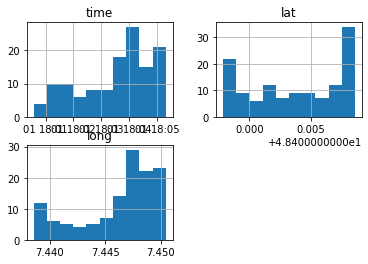

In [ ]:
gps_data.hist()

In [ ]:
gps_data.isna().sum()

time      0
lat       0
long      0
alt     127
dtype: int64

In [ ]:
min_lat, max_lat = min(gps_data["lat"]), max(gps_data["lat"])
min_lon, max_lon = min(gps_data["long"]), max(gps_data["long"])
mymap = gmplot.GoogleMapPlotter(min_lat + (max_lat - min_lat) / 2,
                                min_lon + (max_lon - min_lon) / 2,
                                12)
mymap.plot(gps_data["lat"], gps_data["long"], "red", edge_width=2)
mymap.draw("data_analysis_gps.html")

In [ ]:
import webbrowser
webbrowser.open("data_analysis_gps.html")

True

## Tests

In [30]:
data_path = "../data/android_app/"
rec = 3

# Acceleration data
acc_data = pd.read_csv(os.path.join(data_path, "DATA" + str(rec) + ".txt"), sep=";", header=1, names=["ax", "ay", "az"])

In [31]:
fig = triple_graph(acc_data[["ax", "ay", "az"]])
fig.write_html("data_analysis_acc_2.html", full_html=False, include_plotlyjs="cdn")
fig.show()